In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [77]:
start = '2013-01-01'
end = '2023-09-30'
symbol = 'AAPL'

df = yf.download(symbol, start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769098,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557428,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096230,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001541,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044615,458707200


In [78]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.848328,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.733749,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.205750,66921800
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.465424,56294400
2023-09-29,172.020004,173.070007,170.339996,171.210007,170.984741,51814200


In [79]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769098,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557428,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096230,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001541,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044615,458707200


In [80]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


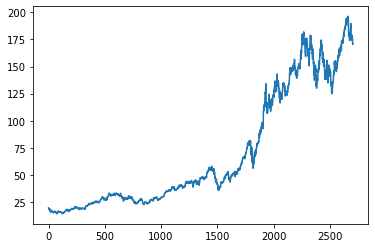

In [81]:
plt.plot(df['Close'])

In [82]:
df

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200
...,...,...,...,...,...
2700,174.199997,176.970001,174.149994,176.080002,46172700
2701,174.820007,175.199997,171.660004,171.960007,64588900
2702,172.619995,173.039993,169.050003,170.429993,66921800
2703,169.339996,172.029999,167.619995,170.690002,56294400


In [83]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2700    181.984400
2701    182.029501
2702    182.075901
2703    182.047101
2704    182.024201
Name: Close, Length: 2705, dtype: float64

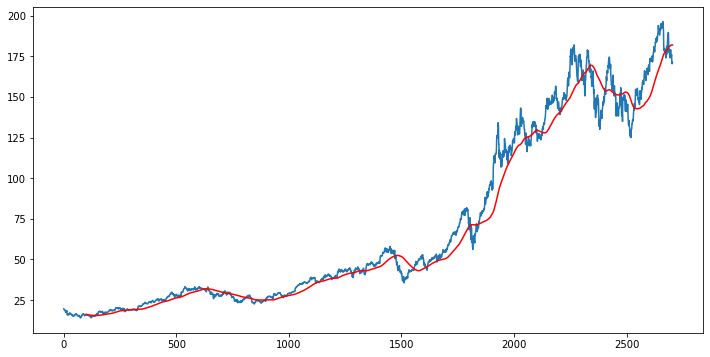

In [84]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [85]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2700    165.65180
2701    165.80690
2702    165.94580
2703    166.08845
2704    166.22205
Name: Close, Length: 2705, dtype: float64

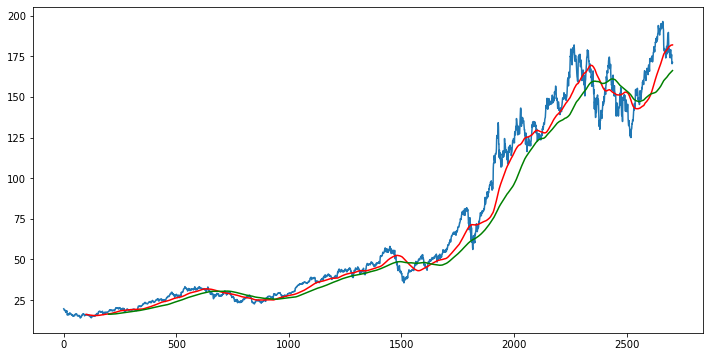

In [86]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [87]:
df.shape

(2705, 5)

In [88]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1893, 1)
(812, 1)


In [89]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [90]:
data_testing.head()

,Close
1893,95.919998
1894,95.477501
1895,97.057503
1896,97.724998
1897,96.522499


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [92]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.06919764],
       [0.06617216],
       [0.05957983],
       ...,
       [0.96846156],
       [0.99498804],
       [1.        ]])

In [93]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [94]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [95]:
# Initialize the model
model = Sequential()

# Add the first LSTM layer with dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second LSTM layer with dropout
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the third LSTM layer with dropout
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Add the fourth LSTM layer with dropout
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(units=1))

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [96]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
57/57 [==============================] - 17s 199ms/step - loss: 0.0262
Epoch 2/50
57/57 [==============================] - 12s 204ms/step - loss: 0.0055
Epoch 3/50
57/57 [==============================] - 12s 213ms/step - loss: 0.0047
Epoch 4/50
57/57 [==============================] - 13s 225ms/step - loss: 0.0036
Epoch 5/50
57/57 [==============================] - 14s 239ms/step - loss: 0.0034
Epoch 6/50
57/57 [==============================] - 13s 223ms/step - loss: 0.0034
Epoch 7/50
57/57 [==============================] - 13s 230ms/step - loss: 0.0032
Epoch 8/50
57/57 [==============================] - 14s 243ms/step - loss: 0.0034
Epoch 9/50
57/57 [==============================] - 13s 231ms/step - loss: 0.0029
Epoch 10/50
57/57 [==============================] - 13s 223ms/step - loss: 0.0033
Epoch 11/50
57/57 [==============================] - 12s 219ms/step - loss: 0.0088
Epoch 12/50
57/57 [==============================] - 12s 216ms/step - loss: 0.0032
Epoch 13/50
5

In [97]:
model.save('keras_model.h5')

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
past_100_days = data_training.tail(100)

In [99]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [100]:
final_df.head()

,Close
0,79.750000
1,80.904999
2,80.074997
3,78.262497
4,74.544998


In [101]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.16855174],
       [0.17678072],
       [0.17086724],
       [0.15795379],
       [0.13146786],
       [0.11347807],
       [0.12161801],
       [0.0875443 ],
       [0.0872593 ],
       [0.13259   ],
       [0.11568675],
       [0.13958997],
       [0.12209896],
       [0.1151702 ],
       [0.07445277],
       [0.10859769],
       [0.09094633],
       [0.04249862],
       [0.09547051],
       [0.03177602],
       [0.05074543],
       [0.03972001],
       [0.0363536 ],
       [0.0086743 ],
       [0.        ],
       [0.04009406],
       [0.03767168],
       [0.06068434],
       [0.04162587],
       [0.0542187 ],
       [0.05329248],
       [0.0294605 ],
       [0.03662077],
       [0.03035108],
       [0.06786243],
       [0.06244767],
       [0.07427464],
       [0.07769445],
       [0.0870634 ],
       [0.11164347],
       [0.10697682],
       [0.11100228],
       [0.10407351],
       [0.09361808],
       [0.0783713 ],
       [0.09213974],
       [0.09023387],
       [0.104

In [102]:
input_data.shape

(912, 1)

In [103]:
from prompt_toolkit.shortcuts import input_dialog
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [104]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(812, 100, 1)
(812,)


In [105]:
# Making Predictions

y_predicted = model.predict(x_test)

26/26 [==============================] - 2s 48ms/step


In [106]:
y_predicted.shape

(812, 1)

In [107]:
y_test

array([0.28375755, 0.2806049 , 0.29186188, 0.29661757, 0.28805016,
       0.28666086, 0.30112392, 0.2914522 , 0.29339366, 0.26184923,
       0.26021053, 0.27584917, 0.26475254, 0.27748786, 0.28568124,
       0.3574266 , 0.37650287, 0.38168607, 0.38451812, 0.4118768 ,
       0.39199904, 0.40350536, 0.37961991, 0.40551808, 0.41976741,
       0.41903712, 0.4168997 , 0.42370377, 0.42473682, 0.44302943,
       0.48645427, 0.49705217, 0.48969595, 0.50179008, 0.49101405,
       0.48957131, 0.51972638, 0.55634715, 0.53654059, 0.46158915,
       0.46215914, 0.40416438, 0.43622537, 0.40893789, 0.39832216,
       0.42226103, 0.42354347, 0.39924834, 0.38649519, 0.36155886,
       0.38464281, 0.39696845, 0.36355382, 0.37139093, 0.40031705,
       0.41941115, 0.41321268, 0.42546711, 0.4324493 , 0.40558929,
       0.43038314, 0.40658679, 0.42026613, 0.41948242, 0.43373174,
       0.486668  , 0.46315659, 0.46379783, 0.46037797, 0.44833727,
       0.42667834, 0.43757907, 0.43301929, 0.42503965, 0.41998

In [108]:
y_predicted

array([[0.25184014],
       [0.25632688],
       [0.26124445],
       [0.26648903],
       [0.27194774],
       [0.2774593 ],
       [0.28280115],
       [0.28783715],
       [0.29243085],
       [0.2964896 ],
       [0.2997608 ],
       [0.30201018],
       [0.30322382],
       [0.3034575 ],
       [0.30288595],
       [0.30179575],
       [0.3009737 ],
       [0.30123985],
       [0.30328578],
       [0.30790895],
       [0.31486842],
       [0.32374656],
       [0.33416677],
       [0.3453324 ],
       [0.35664505],
       [0.36775547],
       [0.37834746],
       [0.38808244],
       [0.39674342],
       [0.40419838],
       [0.41061953],
       [0.41676372],
       [0.42341262],
       [0.43094486],
       [0.43950513],
       [0.44878   ],
       [0.45820564],
       [0.46764112],
       [0.4774317 ],
       [0.4875734 ],
       [0.496584  ],
       [0.5030494 ],
       [0.50545603],
       [0.5034059 ],
       [0.49673045],
       [0.48603964],
       [0.47274315],
       [0.458

In [109]:
scaler.scale_

array([0.00712466])

In [110]:
scale_factor = 1/0.00712466
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

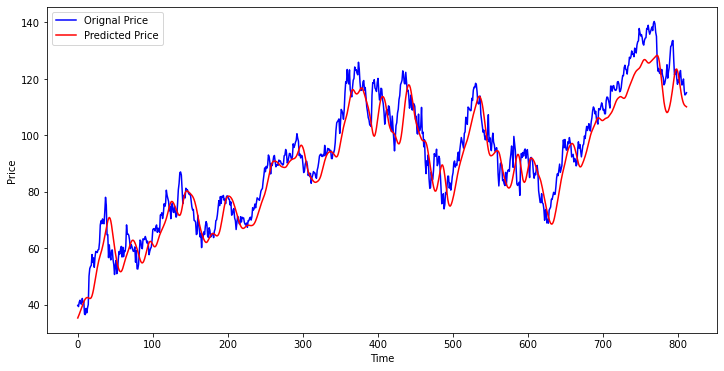

In [111]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inverse transform the scaled predictions and true values
y_test_inverse = y_test / scale_factor
y_predicted_inverse = y_predicted / scale_factor

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inverse, y_predicted_inverse)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inverse, y_predicted_inverse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_predicted)

print(f"Mean Absolute Error (MAE): {mae:.10f}")
print(f"Mean Squared Error (MSE): {mse:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.10f}")
print(f"R-squared (R2) Score: {r2:.10f}")


Mean Absolute Error (MAE): 0.0389959293
Mean Squared Error (MSE): 0.0023170016
Root Mean Squared Error (RMSE): 0.0481352431
R-squared (R2) Score: 0.9062229178


In [113]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

# Print the RMSE
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 6.756146118102413


In [114]:
def accuracy_percentage(target, predicted):
    rmse = np.sqrt(mean_squared_error(target, predicted))
    range_target = np.max(target) - np.min(target)
    accuracy = (1 - (rmse / range_target)) * 100
    return accuracy

# Calculate and print accuracy as a percentage
accuracy_pct = accuracy_percentage(y_test, y_predicted)
print(f"Accuracy as a Percentage: {accuracy_pct:.10f}")


Accuracy as a Percentage: 93.4933861594
